In [1]:
### Load libraries -----
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import imageio
from matplotlib import patches
from matplotlib.lines import Line2D
import plotly.express as px
import plotly.io as pio

In [2]:
### Set font -----
# Source: https://matplotlib.org/stable/tutorials/text/usetex.html
plt.rcParams.update({
"text.usetex": True,
"font.family": "serif",
"font.sans-serif": "mathpazo",
})

In [3]:
### Load ucdp data -------
ucdp = pd.read_csv("https://ucdp.uu.se/downloads/ged/ged221-csv.zip", 
                  low_memory=False)
ucdp.head(3)

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,412700,IRQ-2021-1-524-145,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-26 00:00:00.000,13,1,141,28,183,184,171,645,NaN
2,413023,IRQ-2021-1-524-143,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-28 00:00:00.000,0,2,0,0,2,3,0,645,NaN


In [4]:
### Get initial list of countries in Africa ------
list(ucdp["country_id"].loc[ucdp["region"]=="Africa"].unique())

[615,
 540,
 434,
 571,
 439,
 516,
 471,
 482,
 483,
 581,
 484,
 522,
 490,
 531,
 530,
 420,
 452,
 438,
 404,
 437,
 501,
 572,
 570,
 450,
 620,
 580,
 432,
 435,
 600,
 541,
 565,
 436,
 475,
 517,
 433,
 451,
 520,
 560,
 626,
 625,
 510,
 461,
 616,
 500,
 551,
 552]

In [5]:
### Convert into geopandas df -------
# Source: https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html
df_ucdp_geo = gpd.GeoDataFrame(
    ucdp, geometry=gpd.points_from_xy(ucdp.longitude, ucdp.latitude))
df_ucdp_geo.head(3)

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob,geometry
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,0,4,0,2,6,6,6,645,NaN,POINT (69.16280 34.53109)
1,412700,IRQ-2021-1-524-145,2021,1,Clear,1,259,259,Iraq: Government,524,...,13,1,141,28,183,184,171,645,NaN,POINT (69.21722 34.56444)
2,413023,IRQ-2021-1-524-143,2021,1,Clear,1,259,259,Iraq: Government,524,...,0,2,0,0,2,3,0,645,NaN,POINT (70.45575 34.42884)


In [6]:
### Subset countries in Africa ---------
# Look up missing country codes here: 
# https://dornsife.usc.edu/assets/sites/298/docs/country_to_gwno_PUBLIC_6-5-2015.txt
df_ucdp_geo_s = df_ucdp_geo[df_ucdp_geo["country_id"].isin([615, 540, 434, 571, 439, 516, 471, 482, 483, 581, 484, 522, 490,
       531, 530, 420, 452, 438, 404, 437, 501, 572, 570, 450, 620, 580,
       432, 435, 600, 541, 565, 436, 475, 517, 433, 451, 520, 560, 626,
       625, 510, 461, 616, 500, 551, 552, 651, 553])]
df_ucdp_geo_s.head(3)

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob,geometry
41447,2629,ALG-1990-1-2-1,1990,0,Clear,1,386,386,Algeria: Government,827,...,1,0,0,0,1,1,1,615,NaN,POINT (3.69123 36.14766)
41448,5751,ALG-1991-1-2-4,1991,1,Clear,1,386,386,Algeria: Government,827,...,3,0,0,0,3,3,3,615,NaN,POINT (6.88333 33.33333)
41449,2587,ALG-1991-1-2-1,1991,1,Clear,1,386,386,Algeria: Government,827,...,0,2,1,1,4,4,4,615,NaN,POINT (3.05056 36.76306)


In [7]:
### Load Prio data ------
# Codebook: https://grid.prio.org/#/codebook
prio = pd.read_csv("prio.csv")
prio.head(3)

,gid,year,agri_ih,barren_ih,bdist1,bdist2,bdist3,capdist,diamsec_y,diamprim_y,...,pop_hyd_min,pop_hyd_sd,pop_hyd_sum,prec_gpcc,prec_gpcp,savanna_ih,shrub_ih,temp,urban_ih,water_ih
0,49182,1989,NaN,NaN,103.3474,103.3474,27.00977,2480.495,NaN,NaN,...,NaN,NaN,NaN,215.0550,1009.4620,NaN,NaN,NaN,NaN,NaN
1,49182,1990,NaN,NaN,103.3474,103.3474,27.00977,2480.495,NaN,NaN,...,0.0,0.0,0.0,221.3225,984.8367,NaN,NaN,NaN,NaN,NaN
2,49182,2002,NaN,NaN,103.3474,103.3474,27.00977,2480.495,NaN,NaN,...,NaN,NaN,NaN,188.1025,898.9387,NaN,NaN,NaN,NaN,NaN


In [8]:
### Replace missing values with mean ------
# Source: https://machinelearningmastery.com/handle-missing-data-python/
prio["nlights_mean"].fillna(prio["nlights_mean"].mean(), inplace=True)
prio["prec_gpcc"].fillna(prio["prec_gpcc"].mean(), inplace=True)

In [9]:
### Check -----
# Source: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
prio.isnull().sum().any()

True

In [10]:
### Load Prio grid ------
prio_shp = gpd.read_file('priogrid_cell.shp')
prio_shp.head(3)

,gid,xcoord,ycoord,col,row,geometry
0,259168,163.75,89.75,688,360,"POLYGON ((163.50000 89.50000, 163.50000 90.000..."
1,259169,164.25,89.75,689,360,"POLYGON ((164.00000 89.50000, 164.00000 90.000..."
2,259170,164.75,89.75,690,360,"POLYGON ((164.50000 89.50000, 164.50000 90.000..."


In [11]:
### Merge Prio data with Prio grid ------
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
df_prio = prio.merge(prio_shp, 
                     left_on='gid', 
                     right_on='gid', 
                     how="left")
df_prio.head(3)

,gid,year,agri_ih,barren_ih,bdist1,bdist2,bdist3,capdist,diamsec_y,diamprim_y,...,savanna_ih,shrub_ih,temp,urban_ih,water_ih,xcoord,ycoord,col,row,geometry
0,49182,1989,NaN,NaN,103.3474,103.3474,27.00977,2480.495,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-69.25,-55.75,222,69,"POLYGON ((-69.50000 -56.00000, -69.50000 -55.5..."
1,49182,1990,NaN,NaN,103.3474,103.3474,27.00977,2480.495,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-69.25,-55.75,222,69,"POLYGON ((-69.50000 -56.00000, -69.50000 -55.5..."
2,49182,2002,NaN,NaN,103.3474,103.3474,27.00977,2480.495,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-69.25,-55.75,222,69,"POLYGON ((-69.50000 -56.00000, -69.50000 -55.5..."


In [12]:
### Convert into geopandas df --------
# Source: https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html
df_prio_geo = gpd.GeoDataFrame(
    df_prio, geometry=gpd.points_from_xy(df_prio.xcoord, df_prio.ycoord))
df_prio_geo.head(3)

,gid,year,agri_ih,barren_ih,bdist1,bdist2,bdist3,capdist,diamsec_y,diamprim_y,...,savanna_ih,shrub_ih,temp,urban_ih,water_ih,xcoord,ycoord,col,row,geometry
0,49182,1989,NaN,NaN,103.3474,103.3474,27.00977,2480.495,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-69.25,-55.75,222,69,POINT (-69.25000 -55.75000)
1,49182,1990,NaN,NaN,103.3474,103.3474,27.00977,2480.495,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-69.25,-55.75,222,69,POINT (-69.25000 -55.75000)
2,49182,2002,NaN,NaN,103.3474,103.3474,27.00977,2480.495,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-69.25,-55.75,222,69,POINT (-69.25000 -55.75000)


In [13]:
### Subset countries in Africa ---------
# Look up missing country codes here: 
# https://dornsife.usc.edu/assets/sites/298/docs/country_to_gwno_PUBLIC_6-5-2015.txt
df_prio_geo_s = df_prio_geo[df_prio_geo["gwno"].isin([615, 540, 434, 571, 439, 516, 471, 482, 483, 581, 484, 522, 490,
       531, 530, 420, 452, 438, 404, 437, 501, 572, 570, 450, 620, 580,
       432, 435, 600, 541, 565, 436, 475, 517, 433, 451, 520, 560, 626,
       625, 510, 461, 616, 500, 551, 552, 651, 553])]
df_prio_geo_s

,gid,year,agri_ih,barren_ih,bdist1,bdist2,bdist3,capdist,diamsec_y,diamprim_y,...,savanna_ih,shrub_ih,temp,urban_ih,water_ih,xcoord,ycoord,col,row,geometry
7904,62356,2011,NaN,NaN,1971.6590,1971.6590,8.620533,2482.5310,NaN,NaN,...,NaN,NaN,5.615005,NaN,NaN,37.75,-46.75,436,87,POINT (37.75000 -46.75000)
7905,62356,1995,NaN,NaN,1971.6590,1971.6590,8.620533,2482.5310,NaN,NaN,...,NaN,NaN,5.261664,NaN,NaN,37.75,-46.75,436,87,POINT (37.75000 -46.75000)
7906,62356,1989,NaN,NaN,1971.6590,1971.6590,8.620533,2482.5310,NaN,NaN,...,NaN,NaN,5.510001,NaN,NaN,37.75,-46.75,436,87,POINT (37.75000 -46.75000)
7907,62356,1990,NaN,NaN,1971.6590,1971.6590,8.620533,2482.5310,NaN,NaN,...,NaN,NaN,5.627499,NaN,NaN,37.75,-46.75,436,87,POINT (37.75000 -46.75000)
7908,62356,2002,NaN,NaN,1971.6590,1971.6590,8.620533,2482.5310,NaN,NaN,...,NaN,NaN,5.850832,NaN,NaN,37.75,-46.75,436,87,POINT (37.75000 -46.75000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828797,183263,2012,NaN,NaN,236.1162,118.7386,26.102950,107.3903,NaN,NaN,...,NaN,NaN,19.779170,NaN,NaN,11.25,37.25,383,255,POINT (11.25000 37.25000)
828798,183263,1996,NaN,NaN,236.1162,118.7386,26.102950,107.3903,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.25,37.25,383,255,POINT (11.25000 37.25000)
828799,183263,1995,NaN,NaN,236.1162,118.7386,26.102950,107.3903,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.25,37.25,383,255,POINT (11.25000 37.25000)
828800,183263,2003,NaN,NaN,236.1162,118.7386,26.102950,107.3903,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.25,37.25,383,255,POINT (11.25000 37.25000)


In [14]:
### Aggregate UCDP event data to year -----
# Source: https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
ucdp_s = df_ucdp_geo_s[["priogrid_gid", "year", "best"]]
ucdp_s = ucdp_s.groupby(["priogrid_gid", "year"])['best'].sum().reset_index()

In [15]:
### Merge PRIO and UCDP -----
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
df = df_prio_geo_s.merge(ucdp_s, right_on=["year", "priogrid_gid"], left_on=["year", "gid"], how="left")
df.head(3)

,gid,year,agri_ih,barren_ih,bdist1,bdist2,bdist3,capdist,diamsec_y,diamprim_y,...,temp,urban_ih,water_ih,xcoord,ycoord,col,row,geometry,priogrid_gid,best
0,62356,2011,NaN,NaN,1971.659,1971.659,8.620533,2482.531,NaN,NaN,...,5.615005,NaN,NaN,37.75,-46.75,436,87,POINT (37.75000 -46.75000),NaN,NaN
1,62356,1995,NaN,NaN,1971.659,1971.659,8.620533,2482.531,NaN,NaN,...,5.261664,NaN,NaN,37.75,-46.75,436,87,POINT (37.75000 -46.75000),NaN,NaN
2,62356,1989,NaN,NaN,1971.659,1971.659,8.620533,2482.531,NaN,NaN,...,5.510001,NaN,NaN,37.75,-46.75,436,87,POINT (37.75000 -46.75000),NaN,NaN


In [16]:
### Fill missing values in fatalities variable with zero ------
# Source: https://stackoverflow.com/questions/13295735/how-to-replace-nan-values-by-zeroes-in-a-column-of-a-pandas-dataframe
df["best"].fillna(0, inplace=True)
df.sort_values(by=["year"], inplace=True)
df.head(3)

,gid,year,agri_ih,barren_ih,bdist1,bdist2,bdist3,capdist,diamsec_y,diamprim_y,...,temp,urban_ih,water_ih,xcoord,ycoord,col,row,geometry,priogrid_gid,best
65730,117750,1989,NaN,NaN,259.5540,259.5540,150.4549,179.0894,NaN,NaN,...,23.21667,NaN,NaN,14.75,-8.25,390,164,POINT (14.75000 -8.25000),NaN,0.0
246274,170277,1989,NaN,NaN,352.1597,352.1597,352.1597,1045.8950,NaN,NaN,...,24.69751,NaN,NaN,-1.75,28.25,357,237,POINT (-1.75000 28.25000),NaN,0.0
70642,119934,1989,NaN,NaN,304.7759,304.7759,304.7759,1294.8790,NaN,NaN,...,23.88167,NaN,NaN,26.75,-6.75,414,167,POINT (26.75000 -6.75000),NaN,0.0


### Choropleth and bubble maps 

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


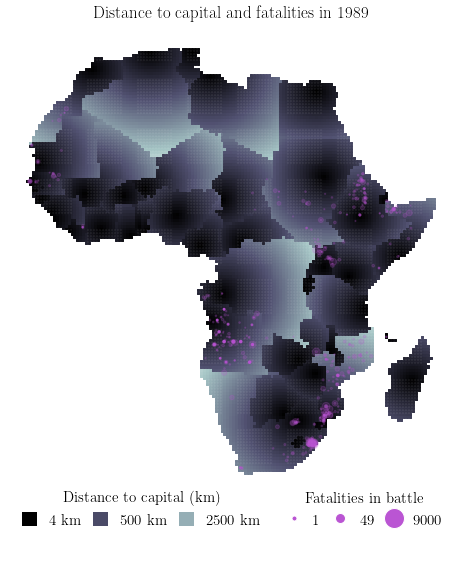

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


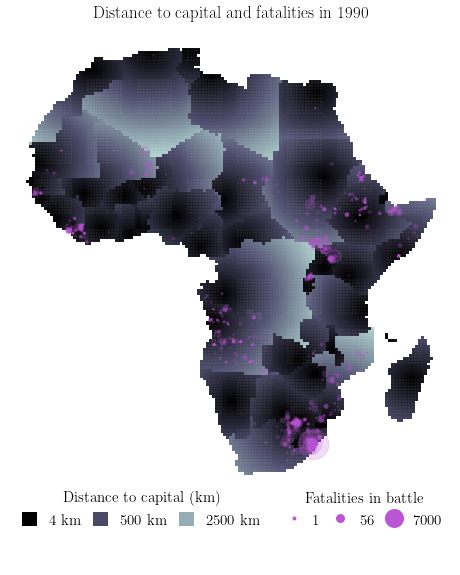

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


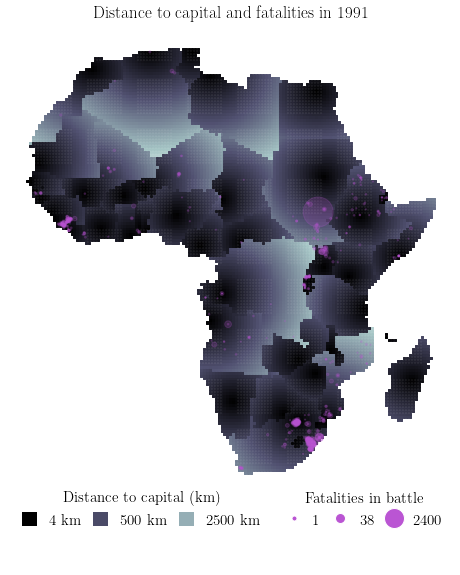

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


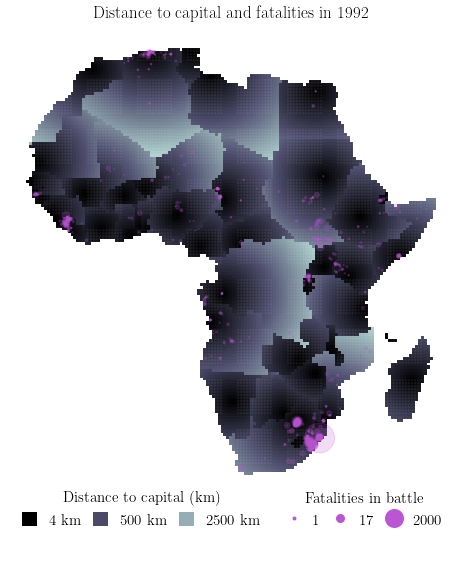

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


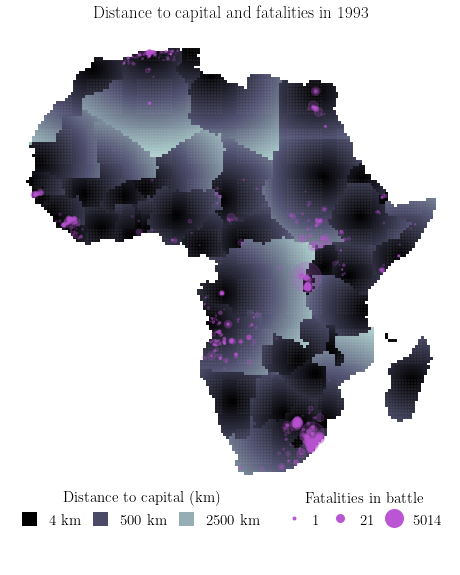

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


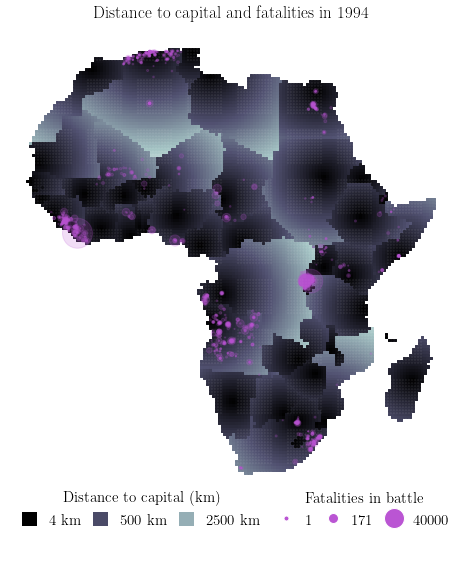

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


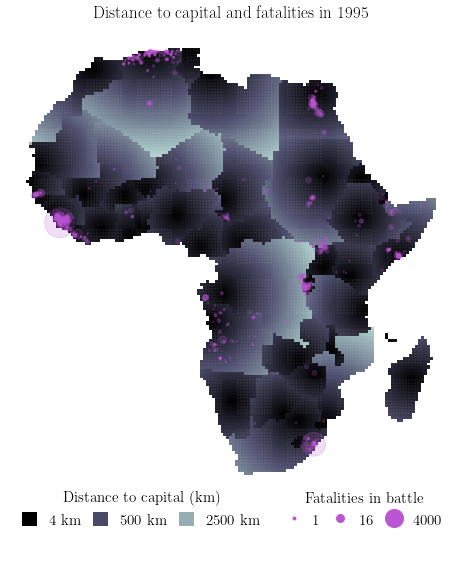

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


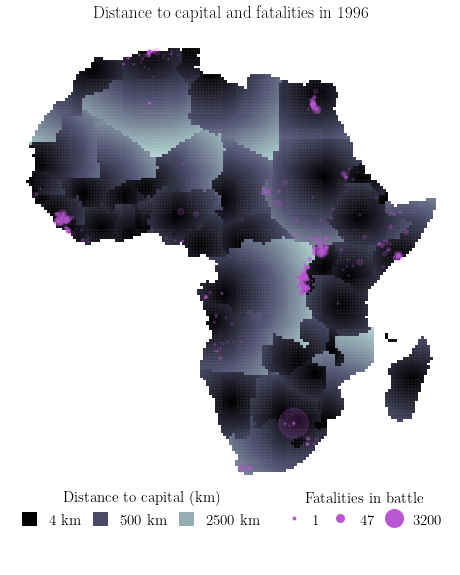

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


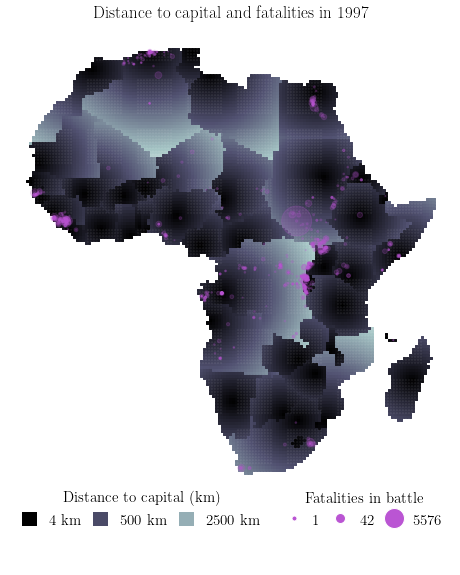

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


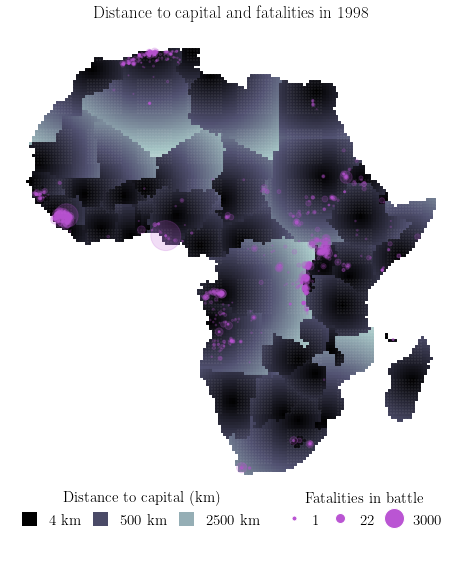

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


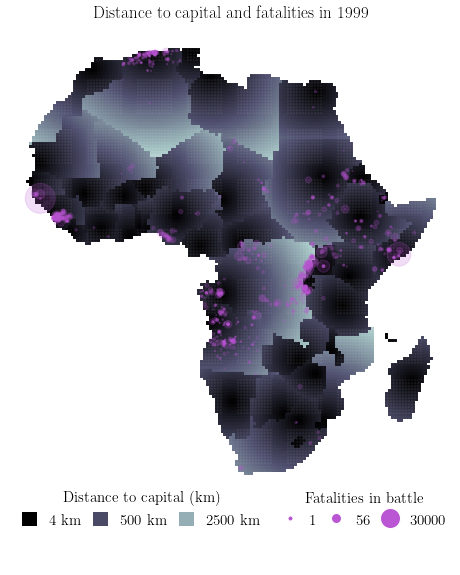

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


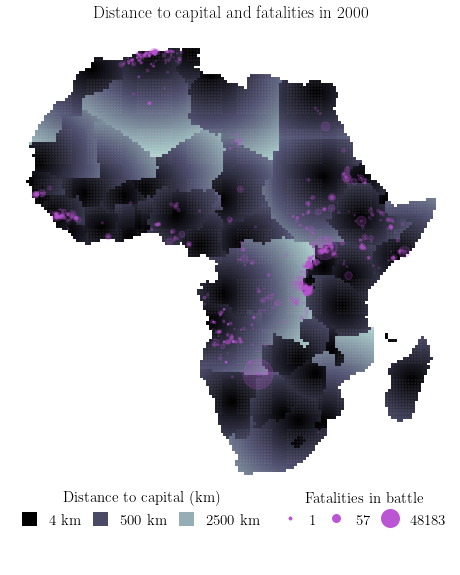

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


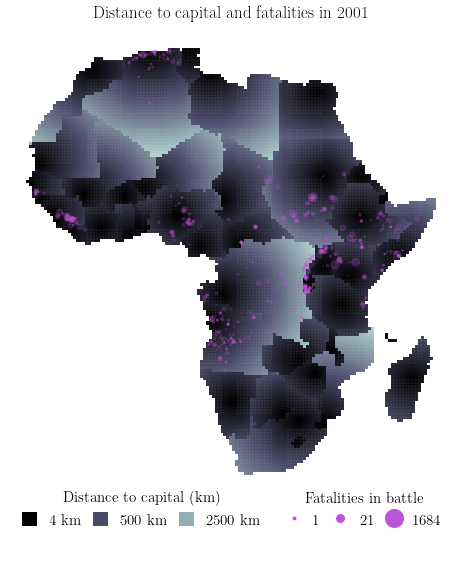

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


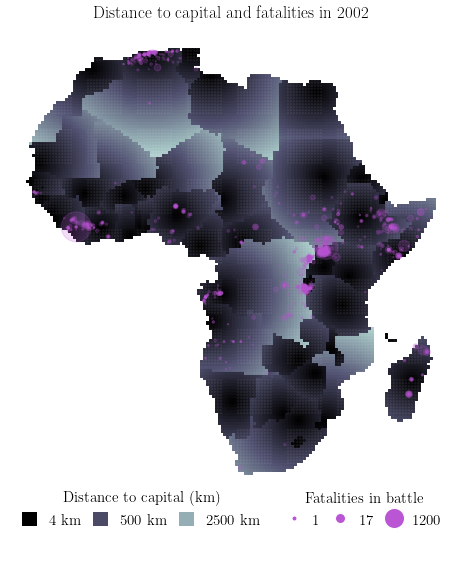

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


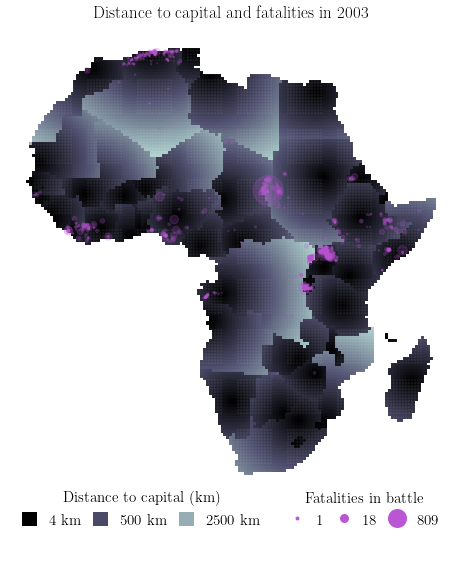

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


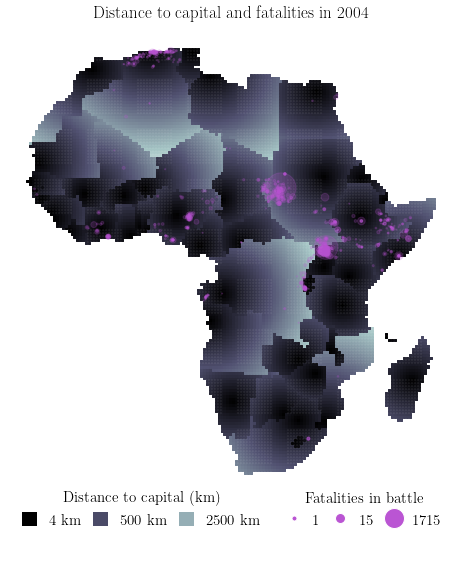

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


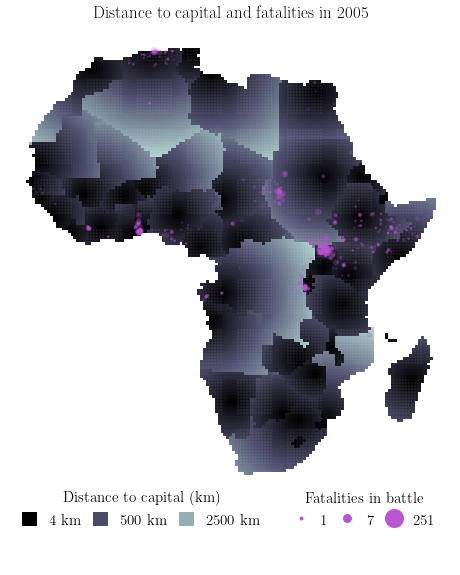

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


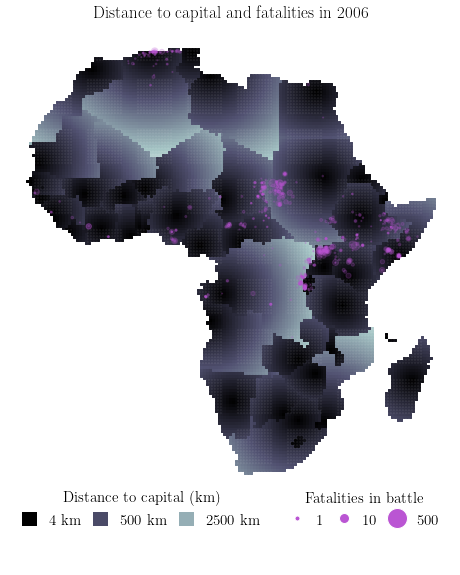

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


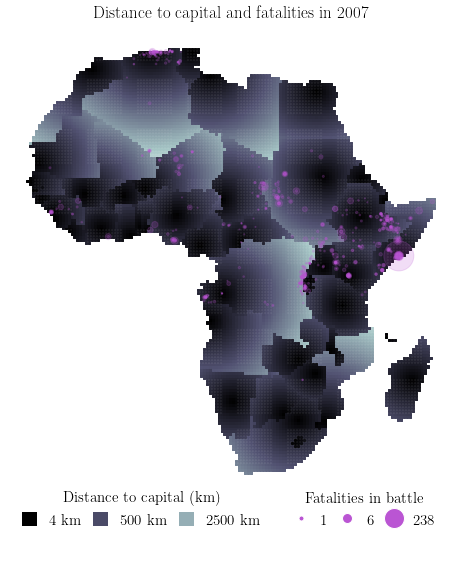

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


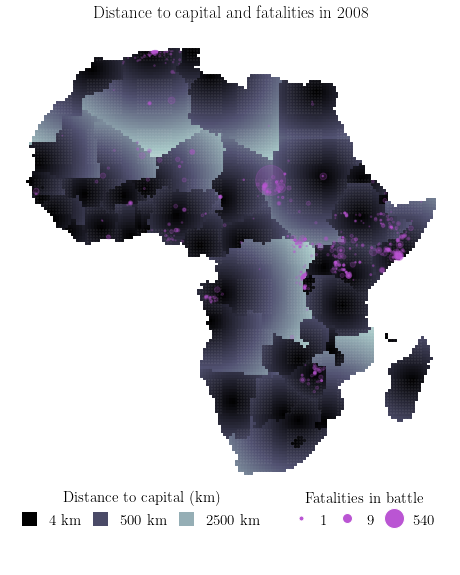

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


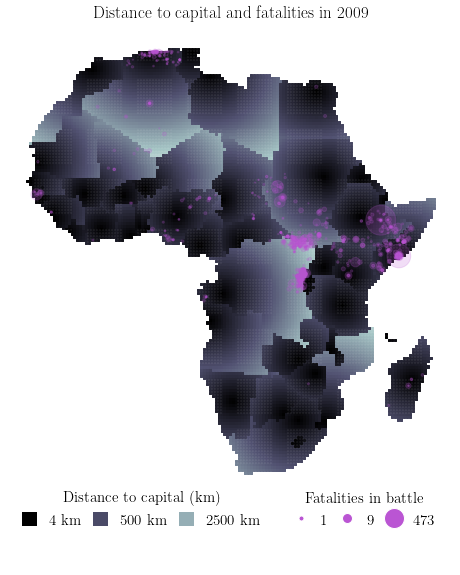

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


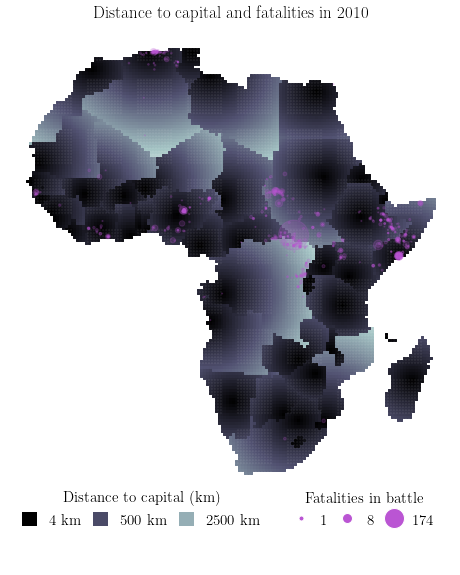

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


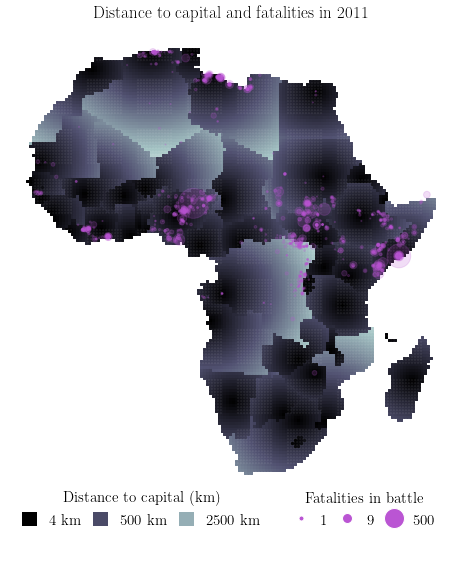

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


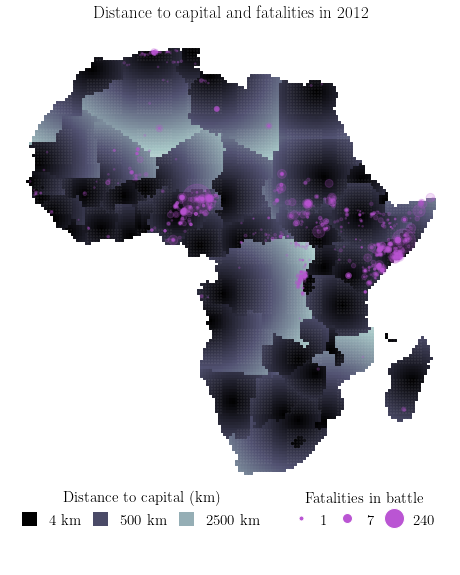

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


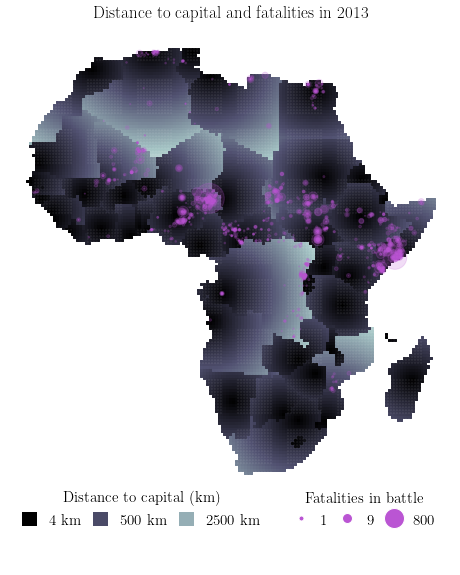

/Users/hannahfrank/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


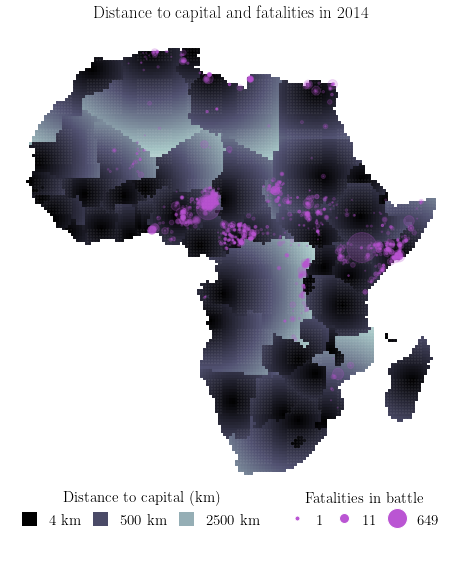

In [17]:
### Distance to capital ### -------

# For each year
for i in [1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 
 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 
 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0]:
    
    # Initiate plot
    fig, ax = plt.subplots(figsize = (10, 10))
    
    # Remove axes
    # Source: https://stackoverflow.com/questions/9295026/how-to-remove-axis-legends-and-white-padding
    plt.axis('off')
    
    # Plot
    df_prio_geo_s.loc[(df_prio_geo_s["year"]==i)].plot(column='capdist',
                                                       ax=ax, 
                                                       marker='s', 
                                                       markersize=5, 
                                                       cmap="bone")
    
    df_ucdp_geo_s.loc[(df_ucdp_geo_s["year"]==i)].plot(column='best',
                                                       ax=ax, 
                                                       marker='o', 
                                                       markersize=df_ucdp_geo_s["best"]*1.5, 
                                                       color="mediumorchid", 
                                                       alpha=0.2)
    
    plt.title(f"Distance to capital and fatalities in {int(i)}", size=17)
    
    # Get color map
    # Source: https://stackoverflow.com/questions/25408393/getting-individual-colors-from-a-color-map-in-matplotlib
    cmap = plt.cm.get_cmap('bone', 4)
    
    # Manually define legend entries
    # Sources: https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
    # https://stackoverflow.com/questions/40672088/matplotlib-customize-the-legend-to-show-squares-instead-of-rectangles
    entries1 = [patches.Rectangle((0,0),1,1, facecolor=cmap(0), label='4 km'),
                patches.Rectangle((0,0),1,1, facecolor=cmap(1), label='500 km'),
                patches.Rectangle((0,0),1,1, facecolor=cmap(2), label='2500 km')]    
    
    # Modify legend
    # Source: https://www.geeksforgeeks.org/use-multiple-columns-in-a-matplotlib-legend/
    # https://stackoverflow.com/questions/40672088/matplotlib-customize-the-legend-to-show-squares-instead-of-rectangles
    # https://stackoverflow.com/questions/25540259/remove-or-adapt-border-of-frame-of-legend-using-matplotlib
    # https://stackoverflow.com/questions/44620013/title-for-matplotlib-legend
    # https://stackoverflow.com/questions/72521182/how-to-reduce-space-between-columns-in-a-horizontal-legend-python
    # https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot
    legend1 = plt.legend(handles=entries1, 
               loc='lower center',
               bbox_to_anchor=(0.3,0.05),
               ncol=3,
               handlelength=1, 
               handleheight=1,
               columnspacing=0.8,
               frameon=False,
               title="Distance to capital (km)",
               prop={'size': 15})
    
    # Increase legend title size
    # Source: https://stackoverflow.com/questions/12402561/how-to-set-font-size-of-matplotlib-axis-legend
    plt.setp(legend1.get_title(),fontsize=15)
    
    # Multiple legends 
    # Source: https://www.tutorialspoint.com/drawing-multiple-legends-on-the-same-axes-in-matplotlib
    plt.gca().add_artist(legend1)
    
    # Manually define legend entries
    # Sources: https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
    entries2 = [Line2D([0], [0],
                       marker='o', 
                       color='w', 
                       markerfacecolor='mediumorchid', 
                       label=1, 
                       markersize=5),
               Line2D([0], [0], 
                      marker='o', 
                      color='w', 
                      markerfacecolor='mediumorchid', 
                      label=f'{round(df_ucdp_geo_s["best"].loc[(df_ucdp_geo_s["year"]==i)].mean())}',
                      markersize=10),
               Line2D([0], [0], 
                      marker='o', 
                      color='w', 
                      markerfacecolor='mediumorchid', 
                      label=f'{round(df_ucdp_geo_s["best"].loc[(df_ucdp_geo_s["year"]==i)].max())}',
                      markersize=20)]
    
    # Modify legend
    # See sources above.
    legend2 = plt.legend(handles=entries2, 
               loc='lower center', 
               ncol=3,
               bbox_to_anchor=(0.8,0.05),
               handlelength=1, 
               handleheight=1,
               columnspacing=0.8,
               frameon=False,
               title="Fatalities in battle",
               prop={'size': 15})

    # Increase legend title size
    # Source: https://stackoverflow.com/questions/12402561/how-to-set-font-size-of-matplotlib-axis-legend
    plt.setp(legend2.get_title(),fontsize=15)
    
    plt.savefig(f"map_capdist_{int(i)}.jpeg", 
                dpi=400)
    
    plt.show()

In [ ]:
### Save as gif -------
# Source: https://towardsdatascience.com/probably-the-easiest-way-to-animate-your-python-plots-f5194ebed75f
with imageio.get_writer('animation_capdis.gif', mode='i') as writer:
    
    # For each year
    for i in [1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 
              1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
              2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]:
        
        # Add six times to play gif slower
        for n in range(6):
            frame = imageio.imread(f'map_capdist_{i}.jpeg')
            writer.append_data(frame)

In [ ]:
### Precipitation per year ### ------

# For each year
for i in [1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 
 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 
 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0]:
    
    # Initiate plot
    fig, ax = plt.subplots(figsize = (10, 10))
    
    # Remove axes
    # Source: https://stackoverflow.com/questions/9295026/how-to-remove-axis-legends-and-white-padding
    plt.axis('off')
    
    # Plot
    df_prio_geo_s.loc[(df_prio_geo_s["year"]==i)].plot(column='prec_gpcc', 
                                                       ax=ax, 
                                                       marker='s', 
                                                       markersize=5, 
                                                       cmap="bone")
    
    df_ucdp_geo_s.loc[(df_ucdp_geo_s["year"]==i)].plot(column='best', 
                                                          ax=ax, 
                                                          marker='o', 
                                                          markersize=df_ucdp_geo_s["best"]*1.5, 
                                                          color="mediumorchid", 
                                                          alpha=0.2)

    plt.title(f"Precipitation per year and fatalities in {int(i)}", size=17)
    
    # Get color map
    # Source: https://stackoverflow.com/questions/25408393/getting-individual-colors-from-a-color-map-in-matplotlib
    cmap = plt.cm.get_cmap('bone', 4)
    
    # Manually define legend entries
    # Sources: https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
    # https://stackoverflow.com/questions/40672088/matplotlib-customize-the-legend-to-show-squares-instead-of-rectangles
    entries1 = [patches.Rectangle((0,0),1,1, facecolor=cmap(0), label='0 mm'),
                patches.Rectangle((0,0),1,1, facecolor=cmap(1), label='100 km'),
                patches.Rectangle((0,0),1,1, facecolor=cmap(2), label='1000 mm')]    
    
    # Modify legend
    # Source: https://www.geeksforgeeks.org/use-multiple-columns-in-a-matplotlib-legend/
    # https://stackoverflow.com/questions/40672088/matplotlib-customize-the-legend-to-show-squares-instead-of-rectangles
    # https://stackoverflow.com/questions/25540259/remove-or-adapt-border-of-frame-of-legend-using-matplotlib
    # https://stackoverflow.com/questions/44620013/title-for-matplotlib-legend
    # https://stackoverflow.com/questions/72521182/how-to-reduce-space-between-columns-in-a-horizontal-legend-python
    # https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot
    legend1 = plt.legend(handles=entries1, 
               loc='lower center',
               bbox_to_anchor=(0.3,0.05),
               ncol=3,
               handlelength=1, 
               handleheight=1,
               columnspacing=0.8,
               frameon=False,
               title="Precipitation (millimeter)", 
               prop={'size': 15})
    
    # Multiple legends
    # Source: https://www.tutorialspoint.com/drawing-multiple-legends-on-the-same-axes-in-matplotlib
    plt.gca().add_artist(legend1)
    
    # Manually define legend entries
    # Sources: https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
    entries2 = [Line2D([0], [0],
                       marker='o', 
                       color='w', 
                       markerfacecolor='mediumorchid', 
                       label=1, 
                       markersize=5),
               Line2D([0], [0], 
                      marker='o', 
                      color='w', 
                      markerfacecolor='mediumorchid', 
                      label=f'{round(df_ucdp_geo_s["best"].loc[(df_ucdp_geo_s["year"]==i)].mean())}',
                      markersize=10),
               Line2D([0], [0], 
                      marker='o', 
                      color='w', 
                      markerfacecolor='mediumorchid', 
                      label=f'{round(df_ucdp_geo_s["best"].loc[(df_ucdp_geo_s["year"]==i)].max())}',
                      markersize=20)]
    
    # Modify legend
    # See sources above.
    plt.legend(handles=entries2, 
               loc='lower center', 
               ncol=3,
               bbox_to_anchor=(0.8,0.05),
               handlelength=1, 
               handleheight=1,
               columnspacing=0.8,
               frameon=False,
               title="Fatalities in battle",
               prop={'size': 15})

    plt.savefig(f"map_prec_gpcc_{int(i)}.jpeg", 
                dpi=400)
    
    plt.show()

In [ ]:
### Save as gif -------
# Source: https://towardsdatascience.com/probably-the-easiest-way-to-animate-your-python-plots-f5194ebed75f
with imageio.get_writer('animation_prec_gpcc.gif', mode='i') as writer:
    
    # For each year
    for i in [1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 
              1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
              2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]:
        
        # Add six times to play gif slower
        for n in range(6):
            frame = imageio.imread(f'map_prec_gpcc_{i}.jpeg')
            writer.append_data(frame)

In [ ]:
### Average night light emission ### ------

# For each year
for i in [1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 
 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 
 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0]:
    
    # Initiate plot
    fig, ax = plt.subplots(figsize = (10, 10))
    
    # Remove axes
    # Source: https://stackoverflow.com/questions/9295026/how-to-remove-axis-legends-and-white-padding
    plt.axis('off')
    
    # Plot
    df_prio_geo_s.loc[(df_prio_geo_s["year"]==i)].plot(column='nlights_mean', 
                                                       ax=ax, 
                                                       marker='s', 
                                                       markersize=5, 
                                                       cmap="bone")
    
    df_ucdp_geo_s.loc[(df_ucdp_geo_s["year"]==i)].plot(column='best', 
                                                          ax=ax, 
                                                          marker='o', 
                                                          markersize=df_ucdp_geo_s["best"]*1.5, 
                                                          color="mediumorchid", 
                                                          alpha=0.2)
    
    plt.title(f"Average night light emission and fatalities in {int(i)}", size=17)
    
    # Get color map
    # Source: https://stackoverflow.com/questions/25408393/getting-individual-colors-from-a-color-map-in-matplotlib
    cmap = plt.cm.get_cmap('bone', 4)
    
    # Manually define legend entries
    # Sources: https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
    # https://stackoverflow.com/questions/40672088/matplotlib-customize-the-legend-to-show-squares-instead-of-rectangles
    entries1 = [patches.Rectangle((0,0),1,1, facecolor=cmap(0), label='0'),
                patches.Rectangle((0,0),1,1, facecolor=cmap(1), label='20'),
                patches.Rectangle((0,0),1,1, facecolor=cmap(2), label='50')]    
    
    # Modify legend
    # Source: https://www.geeksforgeeks.org/use-multiple-columns-in-a-matplotlib-legend/
    # https://stackoverflow.com/questions/40672088/matplotlib-customize-the-legend-to-show-squares-instead-of-rectangles
    # https://stackoverflow.com/questions/25540259/remove-or-adapt-border-of-frame-of-legend-using-matplotlib
    # https://stackoverflow.com/questions/44620013/title-for-matplotlib-legend
    # https://stackoverflow.com/questions/72521182/how-to-reduce-space-between-columns-in-a-horizontal-legend-python
    # https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot
    legend1 = plt.legend(handles=entries1, 
               loc='lower center',
               bbox_to_anchor=(0.3,0.05),
               ncol=3,
               handlelength=1, 
               handleheight=1,
               columnspacing=0.8,
               frameon=False,
               title="Night light emission (index)", 
               prop={'size': 15})
    
    # Multiple legends 
    # Source: https://www.tutorialspoint.com/drawing-multiple-legends-on-the-same-axes-in-matplotlib
    plt.gca().add_artist(legend1)
    
    # Manually define legend entries
    # Sources: https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
    entries2 = [Line2D([0], [0],
                       marker='o', 
                       color='w', 
                       markerfacecolor='mediumorchid', 
                       label=1, 
                       markersize=5),
               Line2D([0], [0], 
                      marker='o', 
                      color='w', 
                      markerfacecolor='mediumorchid', 
                      label=f'{round(df_ucdp_geo_s["best"].loc[(df_ucdp_geo_s["year"]==i)].mean())}',
                      markersize=10),
               Line2D([0], [0], 
                      marker='o', 
                      color='w', 
                      markerfacecolor='mediumorchid', 
                      label=f'{round(df_ucdp_geo_s["best"].loc[(df_ucdp_geo_s["year"]==i)].max())}',
                      markersize=20)]
    
    # Modify legend
    # See sources above.
    plt.legend(handles=entries2, 
               loc='lower center', 
               ncol=3,
               bbox_to_anchor=(0.8,0.05),
               handlelength=1, 
               handleheight=1,
               columnspacing=0.8,
               frameon=False,
               title="Fatalities in battle", 
               prop={'size': 15})

    plt.savefig(f"map_nlights_mean_{int(i)}.jpeg", 
                dpi=400)
    
    plt.show()


In [ ]:
### Save as gif -------
# Source: https://towardsdatascience.com/probably-the-easiest-way-to-animate-your-python-plots-f5194ebed75f

# For each year
with imageio.get_writer('animation_nlights_mean.gif', mode='i') as writer:
    for i in [1992, 1993, 1994, 1995, 1996, 1997, 
              1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
              2007, 2008, 2009, 2010, 2011, 2012, 2013]:
        
        # Add six times to play gif slower
        for n in range(6):
            frame = imageio.imread(f'map_nlights_mean_{i}.jpeg')
            writer.append_data(frame)

### Scatter plots

In [ ]:
### Animated scatterplot - Distance from capital --------

# Plot
# Sources: https://plotly.com/python/line-and-scatter/
# https://plotly.com/python/animations/
# https://plotly.com/python/figure-labels/
# https://plotly.com/python/setting-graph-size/
fig = px.scatter(df, 
                 x="capdist", 
                 y="best", 
                 animation_frame="year",
                 width=500, 
                 height=500,
                 labels=dict(best="Fatalities in battle", 
                       capdist="Distance from capital (km)"),
                range_x=[-100,2400], range_y=[-300,9000])

# Add hover notations and change color of marker
# Sources: https://stackoverflow.com/questions/63460213/plotly-how-to-define-colors-in-a-figure-using-plotly-graph-objects-and-plotly-e
# https://plotly.com/python/hover-text-and-formatting/#hovermode-x-or-y
fig.update_traces(mode="markers", marker=dict(color='black'))

# Change color of marker for all frames
# https://community.plotly.com/t/how-to-set-scatter-plot-marker-color-in-plotly-express-animations/35346
for i in fig.frames:
    i.data[0]['marker']['color'] = 'black'

# Update layout
# Source: https://plotly.com/python/templates/
# https://plotly.com/python/figure-labels/
fig.update_layout(
    font_family="serif",
    size=15,
    template="simple_white")

# Save as html
# Source: https://plotly.com/python/interactive-html-export/
fig.write_html("capdist.html")

fig.show()

In [ ]:
### Static scatter plot - Distance from capital --------

# Plot
# Sources: https://plotly.com/python/line-and-scatter/
# https://plotly.com/python/animations/
# https://plotly.com/python/figure-labels/
# https://plotly.com/python/setting-graph-size/
fig = px.scatter(x=df["capdist"].loc[(df["year"]==1996)], 
                 y=df["best"].loc[(df["year"]==1996)],
                 width=500, 
                 height=500,
                 labels={
                     "x": "Distance from capital (km)",
                     "y": "Fatalities in battle",},
                range_x=[-100,2400], range_y=[-300,9000])

# Add hover notations and change color of marker
# Sources: https://stackoverflow.com/questions/63460213/plotly-how-to-define-colors-in-a-figure-using-plotly-graph-objects-and-plotly-e
# https://plotly.com/python/hover-text-and-formatting/#hovermode-x-or-y
fig.update_traces(mode="markers", marker=dict(color='black'))

# Update layout
# Source: https://plotly.com/python/templates/
# https://plotly.com/python/figure-labels/
fig.update_layout(
    font_family="serif",
    size=15,
    template="simple_white")

# Save as png
# Source: https://plotly.com/python/static-image-export/
fig.write_image("capdist_1996.png")

fig.show()

In [ ]:
### Subset years for percipitation plot ----
df_s = df.loc[df["year"]<=2013]

In [ ]:
### Animated scatterplot - Precipitation --------

# Plot
# Sources: https://plotly.com/python/line-and-scatter/
# https://plotly.com/python/animations/
# https://plotly.com/python/figure-labels/
# https://plotly.com/python/setting-graph-size/
fig = px.scatter(df_s, 
                 x="prec_gpcc", 
                 y="best", 
                 animation_frame="year",
                 width=500, 
                 height=500,
                 labels=dict(best="Fatalities in battle", 
                       prec_gpcc="Precipitation (milimeter)"),
                range_x=[-50,1000], range_y=[-300,9000])

# Add hover notations and change color of marker
# Sources: https://stackoverflow.com/questions/63460213/plotly-how-to-define-colors-in-a-figure-using-plotly-graph-objects-and-plotly-e
# https://plotly.com/python/hover-text-and-formatting/#hovermode-x-or-y
fig.update_traces(mode="markers", marker=dict(color='black'))

# Change color of marker for all frames
# https://community.plotly.com/t/how-to-set-scatter-plot-marker-color-in-plotly-express-animations/35346
for x in fig.frames:
    x.data[0]['marker']['color'] = 'black'

# Update layout
# Source: https://plotly.com/python/templates/
# https://plotly.com/python/figure-labels/
fig.update_layout(
    font_family="serif",
    size=15,
    template="simple_white")

# Save as html
# Source: https://plotly.com/python/interactive-html-export/
fig.write_html("prec_gpcc.html")

fig.show()

In [ ]:
### Static scatter plot - Precipitation --------

# Plot
# Sources: https://plotly.com/python/line-and-scatter/
# https://plotly.com/python/animations/
# https://plotly.com/python/figure-labels/
# https://plotly.com/python/setting-graph-size/
fig = px.scatter(x=df["prec_gpcc"].loc[(df["year"]==1996)], 
                 y=df["best"].loc[(df["year"]==1996)],
                 width=500, 
                 height=500,
                 labels={
                     "x": "Precipitation (milimeter)",
                     "y": "Fatalities in battle",},
                range_x=[-50,1000], range_y=[-300,9000])

# Add hover notations and change color of marker
# Sources: https://stackoverflow.com/questions/63460213/plotly-how-to-define-colors-in-a-figure-using-plotly-graph-objects-and-plotly-e
# https://plotly.com/python/hover-text-and-formatting/#hovermode-x-or-y
fig.update_traces(mode="markers", marker=dict(color='black'))

# Update layout
# Source: https://plotly.com/python/templates/
# https://plotly.com/python/figure-labels/
fig.update_layout(
    font_family="serif",
    size=15,
    template="simple_white")

# Save as png
# Source: https://plotly.com/python/static-image-export/
fig.write_image("prec_gpcc_1996.png")

fig.show()

In [ ]:
### Subset years for nightlight plot ----
df_s = df.loc[df["year"]>=1992]

In [ ]:
### Animated scatterplot - Night light --------

# Plot
# Sources: https://plotly.com/python/line-and-scatter/
# https://plotly.com/python/animations/
# https://plotly.com/python/figure-labels/
# https://plotly.com/python/setting-graph-size/
fig = px.scatter(df_s, 
                 x="nlights_mean", 
                 y="best", 
                 animation_frame="year",
                 width=500, 
                 height=500,
                 labels=dict(best="Fatalities in battle", 
                       nlights_mean="Night light emission (index)"),
                range_x=[-2,50], range_y=[-300,9000])

# Add hover notations and change color of marker
# Sources: https://stackoverflow.com/questions/63460213/plotly-how-to-define-colors-in-a-figure-using-plotly-graph-objects-and-plotly-e
# https://plotly.com/python/hover-text-and-formatting/#hovermode-x-or-y
fig.update_traces(mode="markers", marker=dict(color='black'))

# Change color of marker for all frames
# https://community.plotly.com/t/how-to-set-scatter-plot-marker-color-in-plotly-express-animations/35346
for x in fig.frames:
    x.data[0]['marker']['color'] = 'black'

# Update layout
# Source: https://plotly.com/python/templates/
# https://plotly.com/python/figure-labels/
fig.update_layout(
    font_family="serif",
    size=15,
    template="simple_white")

# Save as html
# Source: https://plotly.com/python/interactive-html-export/
fig.write_html("nlights_mean.html")

fig.show()

In [ ]:
### Static scatter plot - Night light --------

# Plot
# Sources: https://plotly.com/python/line-and-scatter/
# https://plotly.com/python/animations/
# https://plotly.com/python/figure-labels/
# https://plotly.com/python/setting-graph-size/
fig = px.scatter(x=df["nlights_mean"].loc[(df["year"]==1996)], 
                 y=df["best"].loc[(df["year"]==1996)],
                 width=500, 
                 height=500,
                 labels={
                     "x": "Night light emission (index)",
                     "y": "Fatalities in battle",},
                #title="Average night light emission and fatalities in battle for 1996",
                range_x=[-2,50], range_y=[-300,9000])

# Add hover notations and change color of marker
# Sources: https://stackoverflow.com/questions/63460213/plotly-how-to-define-colors-in-a-figure-using-plotly-graph-objects-and-plotly-e
# https://plotly.com/python/hover-text-and-formatting/#hovermode-x-or-y
fig.update_traces(mode="markers", marker=dict(color='black'))

# Update layout
# Source: https://plotly.com/python/templates/
# https://plotly.com/python/figure-labels/
fig.update_layout(
    font_family="serif",
    size=15,
    template="simple_white")

# Save
# Source: https://plotly.com/python/static-image-export/
fig.write_image("nlights_mean_1996.png")

fig.show()